<a href="https://colab.research.google.com/github/nielsin14/Trabajos_final_TP2/blob/main/trabajo_final_TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install geopandas
!pip install salem
!pip install netcdf4
!pip install rasterio
import numpy as np
import zipfile
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import salem
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 47.3 MB/s eta 0:00:00


In [ ]:
PISCOp= xr.open_dataset("/content/drive/MyDrive/datos/Copia de PISCOp.nc")
PISCOp

<xarray.Dataset>
Dimensions:  (T: 13149, Y: 198, X: 133)
Coordinates:
  * T        (T) datetime64[ns] 1981-01-01T12:00:00 ... 2016-12-31T12:00:00
  * Y        (Y) float32 0.95 0.85 0.75 0.65 ... -18.45 -18.55 -18.65 -18.75
  * X        (X) float32 -81.25 -81.15 -81.05 -80.95 ... -68.25 -68.15 -68.05
Data variables:
    Prec     (T, Y, X) float32 ...

In [ ]:
PISCOp=PISCOp.rename({"T":"time","X": "longitude", "Y": "latitude"})

In [ ]:
PISCOp["time"]

<xarray.DataArray 'time' (time: 13149)>
array(['1981-01-01T12:00:00.000000000', '1981-01-02T12:00:00.000000000',
       '1981-01-03T12:00:00.000000000', ..., '2016-12-29T12:00:00.000000000',
       '2016-12-30T12:00:00.000000000', '2016-12-31T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01T12:00:00 ... 2016-12-31T12:00:00
Attributes:
    standard_name:  time
    pointwidth:     1.0
    gridtype:       0

In [ ]:
len(PISCOp["time"])

13149

In [ ]:
PISCOp["time"] = pd.date_range(start="1981-01-01T12:00:00.000000000",freq="24H", periods= 13149)
PISCOp

<xarray.Dataset>
Dimensions:    (time: 13149, latitude: 198, longitude: 133)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-01T12:00:00 ... 2016-12-31T12:00:00
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
Data variables:
    Prec       (time, latitude, longitude) float32 ...

In [ ]:
PISCOp["time"]=pd.date_range("1981-01-01", freq='D',periods=13149)

In [ ]:
PISCOp_filtro= PISCOp.sel(time=slice('1981-01-01T12:00:00.000000000','2016-01-01T12:00:00.000000000'))
PISCOp_filtro

<xarray.Dataset>
Dimensions:    (time: 12783, latitude: 198, longitude: 133)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-02 1981-01-03 ... 2016-01-01
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
Data variables:
    Prec       (time, latitude, longitude) float32 ...

In [ ]:
#Climatologia mensual de PP
piscop_m=PISCOp.resample(time="1M", skipna=True).sum(dim="time")
piscop_m=piscop_m.Prec.groupby(piscop_m.time.dt.month).mean(dim="time")
piscop_m

<xarray.DataArray 'Prec' (month: 12, latitude: 198, longitude: 133)>
array([[[  0.       ,   0.       ,   0.       , ..., 250.02522  ,
         182.7587   , 178.41618  ],
        [  0.       ,   0.       ,   0.       , ..., 274.86935  ,
         214.97586  , 208.87346  ],
        [  0.       ,   0.       ,   0.       , ..., 311.66937  ,
         261.0767   , 238.50163  ],
        ...,
        [  0.       ,   0.       ,   0.       , ...,  99.78298  ,
          99.7469   , 100.636314 ],
        [  0.       ,   0.       ,   0.       , ..., 105.487114 ,
         105.49649  ,  99.21408  ],
        [  0.       ,   0.       ,   0.       , ...,  96.623215 ,
          89.158516 ,  83.22309  ]],

       [[  0.       ,   0.       ,   0.       , ..., 247.55894  ,
         199.23326  , 194.2985   ],
        [  0.       ,   0.       ,   0.       , ..., 266.94333  ,
         221.90775  , 230.80647  ],
        [  0.       ,   0.       ,   0.       , ..., 292.84875  ,
         249.47087  , 238.73138  ],
...
        [  0.       ,   0.       ,   0.       , ...,   1.8384433,
           1.9869035,   2.2168884],
        [  0.       ,   0.       ,   0.       , ...,   2.0083284,
           2.208728 ,   4.9719405],
        [  0.       ,   0.       ,   0.       , ...,   4.856501 ,
           5.5243435,   5.5275464]],

       [[  0.       ,   0.       ,   0.       , ..., 247.40994  ,
         398.2579   , 525.47864  ],
        [  0.       ,   0.       ,   0.       , ..., 278.8407   ,
         367.33994  , 424.12216  ],
        [  0.       ,   0.       ,   0.       , ..., 286.79596  ,
         304.91174  , 287.64905  ],
        ...,
        [  0.       ,   0.       ,   0.       , ...,  28.129019 ,
          22.419977 ,  23.805998 ],
        [  0.       ,   0.       ,   0.       , ...,  20.320295 ,
          20.136827 ,  26.310995 ],
        [  0.       ,   0.       ,   0.       , ...,  22.036446 ,
          24.80561  ,  29.898746 ]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:       Precipitation
    units:           mm/day
    colormap:        [null 16777215 16777215 16777215 [16777215 3] 14155730 [...
    colorscalename:  precip_colors
    maxncolor:       254
    ncolor:          254
    scale_min:       0.0
    CS:              0

In [ ]:
#save
piscop_m.to_netcdf("pisco_clim_monthly.nc")

In [ ]:
humedad=xr.open_dataset("/content/drive/MyDrive/datos/SM_mean_2001_2005.nc", decode_times=False)
humedad

<xarray.Dataset>
Dimensions:      (X: 133, Y: 198, band: 1, month: 12)
Coordinates:
  * X            (X) float64 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
  * Y            (Y) float64 0.95 0.85 0.75 0.65 ... -18.45 -18.55 -18.65 -18.75
  * band         (band) int64 1
    spatial_ref  int64 ...
  * month        (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
    T            float32 ...
Data variables:
    sm           (month, band, Y, X) float32 ...

In [ ]:
print(humedad.keys())


KeysView(<xarray.Dataset>
Dimensions:      (X: 133, Y: 198, band: 1, month: 12)
Coordinates:
  * X            (X) float64 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
  * Y            (Y) float64 0.95 0.85 0.75 0.65 ... -18.45 -18.55 -18.65 -18.75
  * band         (band) int64 1
    spatial_ref  int64 ...
  * month        (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
    T            float32 ...
Data variables:
    sm           (month, band, Y, X) float32 ...)


In [ ]:
print(humedad['sm'])


<xarray.DataArray 'sm' (month: 12, band: 1, Y: 198, X: 133)>
[316008 values with dtype=float32]
Coordinates:
  * X            (X) float64 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
  * Y            (Y) float64 0.95 0.85 0.75 0.65 ... -18.45 -18.55 -18.65 -18.75
  * band         (band) int64 1
    spatial_ref  int64 ...
  * month        (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
    T            float32 ...


In [ ]:
humedad_1 = humedad['sm'].isel(month=0)
humedad_6 = humedad['sm'].isel(month=5)

In [ ]:
#save nc
humedad.to_netcdf("humedad_monthly.nc")

In [ ]:
shdf = ("/content/drive/MyDrive/datos/areas naturales del peru")
shdf = gpd.read_file(shdf)

In [ ]:
shp= ("/content/drive/MyDrive/datos/sudamerica")
shp = gpd.read_file(shp)

In [ ]:
piscop_m

<xarray.DataArray 'Prec' (month: 12, latitude: 198, longitude: 133)>
array([[[  0.       ,   0.       ,   0.       , ..., 250.02522  ,
         182.7587   , 178.41618  ],
        [  0.       ,   0.       ,   0.       , ..., 274.86935  ,
         214.97586  , 208.87346  ],
        [  0.       ,   0.       ,   0.       , ..., 311.66937  ,
         261.0767   , 238.50163  ],
        ...,
        [  0.       ,   0.       ,   0.       , ...,  99.78298  ,
          99.7469   , 100.636314 ],
        [  0.       ,   0.       ,   0.       , ..., 105.487114 ,
         105.49649  ,  99.21408  ],
        [  0.       ,   0.       ,   0.       , ...,  96.623215 ,
          89.158516 ,  83.22309  ]],

       [[  0.       ,   0.       ,   0.       , ..., 247.55894  ,
         199.23326  , 194.2985   ],
        [  0.       ,   0.       ,   0.       , ..., 266.94333  ,
         221.90775  , 230.80647  ],
        [  0.       ,   0.       ,   0.       , ..., 292.84875  ,
         249.47087  , 238.73138  ],
...
        [  0.       ,   0.       ,   0.       , ...,   1.8384433,
           1.9869035,   2.2168884],
        [  0.       ,   0.       ,   0.       , ...,   2.0083284,
           2.208728 ,   4.9719405],
        [  0.       ,   0.       ,   0.       , ...,   4.856501 ,
           5.5243435,   5.5275464]],

       [[  0.       ,   0.       ,   0.       , ..., 247.40994  ,
         398.2579   , 525.47864  ],
        [  0.       ,   0.       ,   0.       , ..., 278.8407   ,
         367.33994  , 424.12216  ],
        [  0.       ,   0.       ,   0.       , ..., 286.79596  ,
         304.91174  , 287.64905  ],
        ...,
        [  0.       ,   0.       ,   0.       , ...,  28.129019 ,
          22.419977 ,  23.805998 ],
        [  0.       ,   0.       ,   0.       , ...,  20.320295 ,
          20.136827 ,  26.310995 ],
        [  0.       ,   0.       ,   0.       , ...,  22.036446 ,
          24.80561  ,  29.898746 ]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:       Precipitation
    units:           mm/day
    colormap:        [null 16777215 16777215 16777215 [16777215 3] 14155730 [...
    colorscalename:  precip_colors
    maxncolor:       254
    ncolor:          254
    scale_min:       0.0
    CS:              0

In [ ]:
PISCOp

<xarray.Dataset>
Dimensions:    (time: 13149, latitude: 198, longitude: 133)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2016-12-31
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
Data variables:
    Prec       (time, latitude, longitude) float32 ...

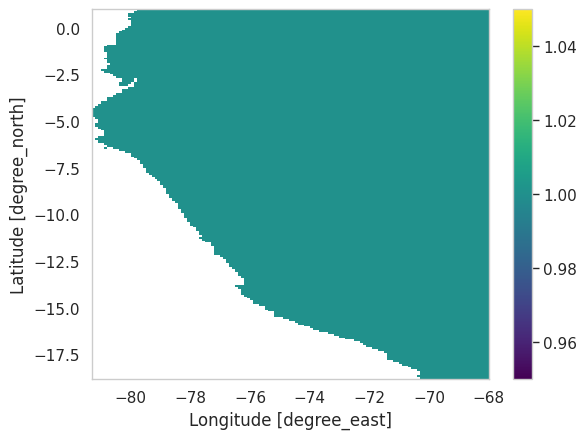

In [ ]:
#crop
to_mask = piscop_m.isel(month=0).copy()
to_mask = to_mask.to_numpy()
to_mask[to_mask > 0] = 1
to_mask[to_mask == 0] = np.nan
to_mask = xr.DataArray(to_mask, coords={"longitude":piscop_m.longitude, "latitude":piscop_m.latitude}, dims=["latitude","longitude"])
to_mask.plot()

In [ ]:
#multiplicar
l=piscop_m*to_mask
#xarray dataarray a dataset
PPM_wo=l.to_dataset(name="Prec")
#exportar a archivo nc
PPM_wo.to_netcdf("PP_wo.nc")
PP_1=PPM_wo.isel(month=0)
PP_6=PPM_wo.isel(month=5)

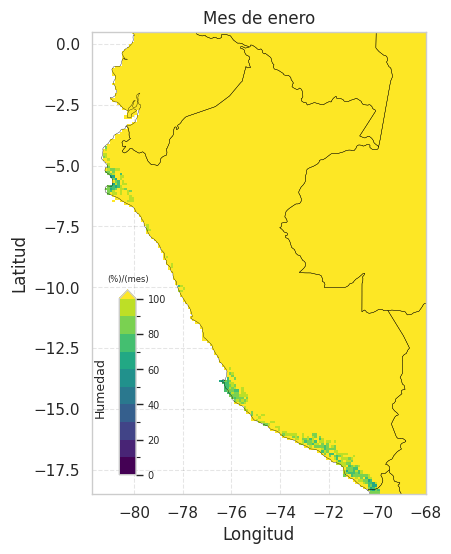

In [ ]:
# Crea la figura y los ejes
fig, ax2 = plt.subplots(figsize=(8, 6))

# Plot de los datos de humedad
im = humedad_1.plot(ax=ax2, levels=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], cmap="viridis", add_colorbar=False)

# Agregar colorbar
axin = inset_axes(ax2, width='5%', height='40%', loc='lower left', bbox_to_anchor=(0.06, 0.025, 1, 1), bbox_transform=ax2.transAxes)
cb = plt.colorbar(im, cax=axin, orientation="vertical", aspect=4, ticks=[0, 20, 40, 60, 80, 100])
cb.ax.set_yticklabels([0, 20, 40, 60, 80, 100], fontdict={"fontsize": 7})
cb.ax.set_ylabel('Humedad', labelpad=-52, fontsize=9)
cb.ax.set_title('(%)/(mes)', fontsize=6)

# Dibujar límites geográficos
shp.geometry.boundary.plot(ax=ax2, edgecolor="black", linewidth=0.25)
shdf.geometry.boundary.plot(ax=ax2, edgecolor="black", linewidth=0.75)

# Configuración adicional del plot
ax2.set_ylim(-18.5, 0.5)
ax2.set_xlim(-81.75, -68)
ax2.set_ylabel("Latitud")
ax2.set_xlabel("Longitud")
ax2.set_title("Mes de enero")
ax2.grid(True, linestyle='--', color="black", alpha=0.1)

# Muestra el gráfico
plt.show()


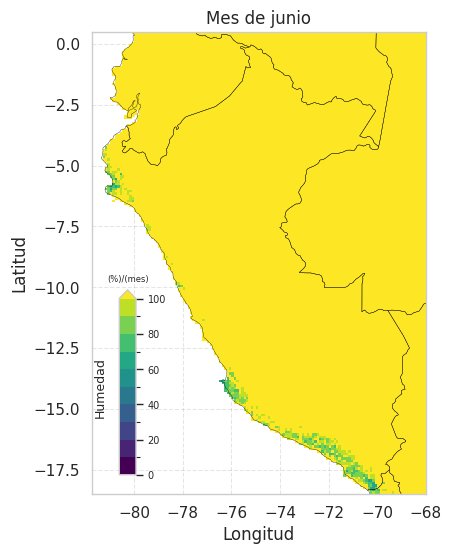

In [ ]:
#plot figure 5
# Crea la figura y los ejes
fig, ax2 = plt.subplots(figsize=(8, 6))

# Plot de los datos de humedad para el sexto mes
im = humedad_6.plot(ax=ax2, levels=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], cmap="viridis", add_colorbar=False)

# Agregar colorbar
axin = inset_axes(ax2, width='5%', height='40%', loc='lower left', bbox_to_anchor=(0.06, 0.025, 1, 1), bbox_transform=ax2.transAxes)
cb = plt.colorbar(im, cax=axin, orientation="vertical", aspect=4, ticks=[0, 20, 40, 60, 80, 100])
cb.ax.set_yticklabels([0, 20, 40, 60, 80, 100], fontdict={"fontsize": 7})
cb.ax.set_ylabel('Humedad', labelpad=-52, fontsize=9)
cb.ax.set_title('(%)/(mes)', fontsize=6)

# Dibujar límites geográficos
shp.geometry.boundary.plot(ax=ax2, edgecolor="black", linewidth=0.25)
shdf.geometry.boundary.plot(ax=ax2, edgecolor="black", linewidth=0.75)

# Configuración adicional del plot
ax2.set_ylim(-18.5, 0.5)
ax2.set_xlim(-81.75, -68)
ax2.set_ylabel("Latitud")
ax2.set_xlabel("Longitud")
ax2.set_title("Mes de junio")
ax2.grid(True, linestyle='--', color="black", alpha=0.1)

# Muestra el gráfico
plt.show()


<ipython-input-33-61a1a39effda>:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


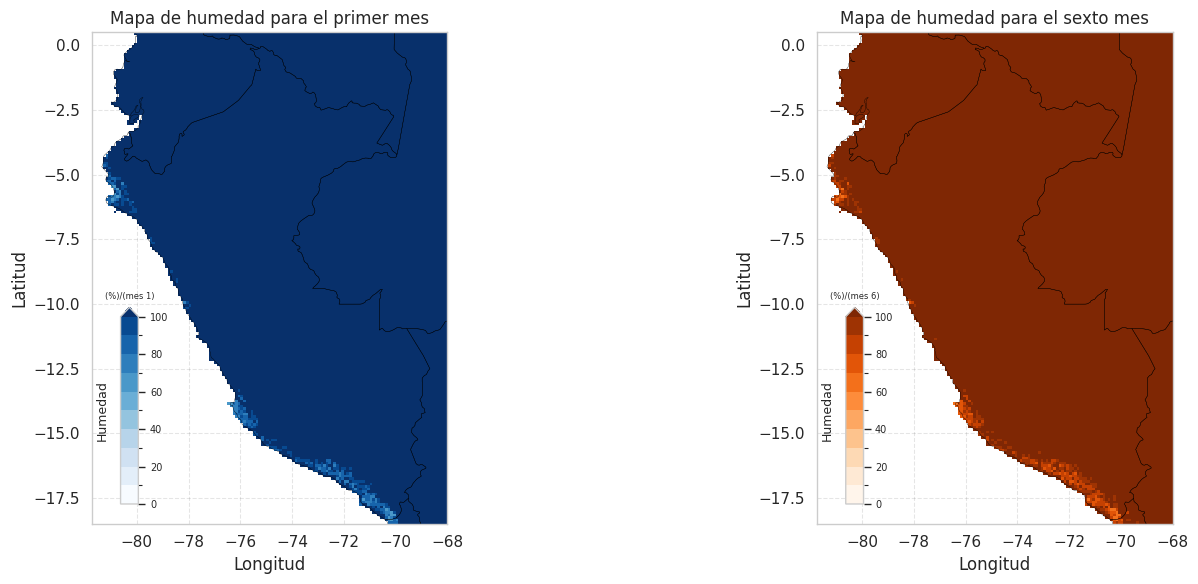

In [ ]:

# Crea la figura y los ejes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot de los datos de humedad para el primer mes
im1 = humedad_1.plot(ax=ax1, levels=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], cmap="Blues", add_colorbar=False)
axin1 = inset_axes(ax1, width='5%', height='40%', loc='lower left', bbox_to_anchor=(0.06, 0.025, 1, 1), bbox_transform=ax1.transAxes)
cb1 = plt.colorbar(im1, cax=axin1, orientation="vertical", aspect=4, ticks=[0, 20, 40, 60, 80, 100])
cb1.ax.set_yticklabels([0, 20, 40, 60, 80, 100], fontdict={"fontsize": 7})
cb1.ax.set_ylabel('Humedad', labelpad=-52, fontsize=9)
cb1.ax.set_title('(%)/(mes 1)', fontsize=6)

# Dibujar límites geográficos
shp.geometry.boundary.plot(ax=ax1, edgecolor="black", linewidth=0.25)
shdf.geometry.boundary.plot(ax=ax1, edgecolor="black", linewidth=0.75)

ax1.set_ylim(-18.5, 0.5)
ax1.set_xlim(-81.75, -68)
ax1.set_ylabel("Latitud")
ax1.set_xlabel("Longitud")
ax1.set_title("Mapa de humedad para el primer mes")
ax1.grid(True, linestyle='--', color="black", alpha=0.1)

# Plot de los datos de humedad para el sexto mes
im2 = humedad_6.plot(ax=ax2, levels=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], cmap="Oranges", add_colorbar=False)
axin2 = inset_axes(ax2, width='5%', height='40%', loc='lower left', bbox_to_anchor=(0.06, 0.025, 1, 1), bbox_transform=ax2.transAxes)
cb2 = plt.colorbar(im2, cax=axin2, orientation="vertical", aspect=4, ticks=[0, 20, 40, 60, 80, 100])
cb2.ax.set_yticklabels([0, 20, 40, 60, 80, 100], fontdict={"fontsize": 7})
cb2.ax.set_ylabel('Humedad', labelpad=-52, fontsize=9)
cb2.ax.set_title('(%)/(mes 6)', fontsize=6)

# Dibujar límites geográficos
shp.geometry.boundary.plot(ax=ax2, edgecolor="black", linewidth=0.25)
shdf.geometry.boundary.plot(ax=ax2, edgecolor="black", linewidth=0.75)

ax2.set_ylim(-18.5, 0.5)
ax2.set_xlim(-81.75, -68)
ax2.set_ylabel("Latitud")
ax2.set_xlabel("Longitud")
ax2.set_title("Mapa de humedad para el sexto mes")
ax2.grid(True, linestyle='--', color="black", alpha=0.1)

# Ajustar la disposición de los gráficos en la figura
plt.tight_layout()

# Muestra los gráficos
plt.show()


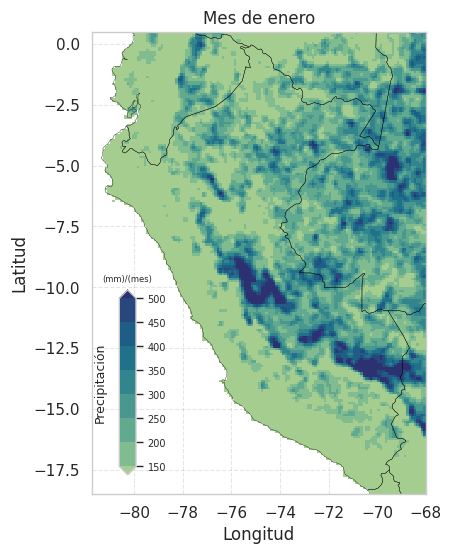

In [ ]:
# Crea la figura y los ejes
fig, ax3 = plt.subplots(figsize=(8, 6))

# Plot de los datos de precipitación para el primer mes
im = PP_1.Prec.plot(ax=ax3, levels=[150, 200, 250, 300, 350, 400, 450, 500], cmap="crest", add_colorbar=False)

# Agregar colorbar
axin = inset_axes(ax3, width='5%', height='40%', loc='lower left', bbox_to_anchor=(0.06, 0.025, 1, 1), bbox_transform=ax3.transAxes)
cb = plt.colorbar(im, cax=axin, orientation="vertical", aspect=4, ticks=[150, 200, 250, 300, 350, 400, 450, 500])
cb.ax.set_yticklabels([150, 200, 250, 300, 350, 400, 450, 500], fontdict={"fontsize": 7})
cb.ax.set_ylabel('Precipitación', labelpad=-52, fontsize=9)
cb.ax.set_title('(mm)/(mes)', fontsize=6)

# Dibujar límites geográficos
shp.geometry.boundary.plot(ax=ax3, edgecolor="black", linewidth=0.25)
shdf.geometry.boundary.plot(ax=ax3, edgecolor="black", linewidth=0.75)

ax3.set_ylim(-18.5, 0.5)
ax3.set_xlim(-81.75, -68)
ax3.set_ylabel("Latitud")
ax3.set_xlabel("Longitud")
ax3.set_title("Mes de enero")
ax3.grid(True, linestyle='--', color="black", alpha=0.1)

# Muestra el gráfico
plt.show()


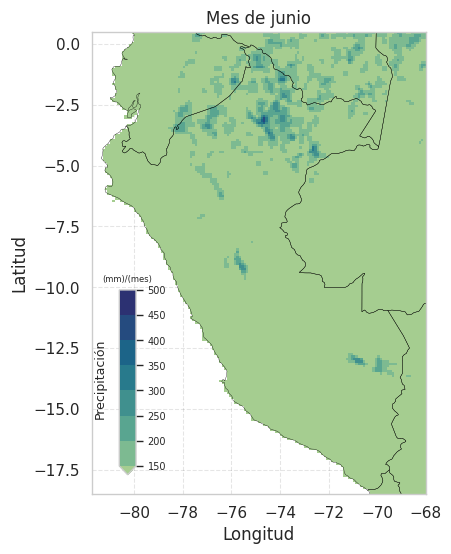

In [ ]:
# Crea la figura y los ejes
fig, ax3 = plt.subplots(figsize=(8, 6))

# Plot de los datos de precipitación para el sexto mes
im = PP_6.Prec.plot(ax=ax3, levels=[150, 200, 250, 300, 350, 400, 450, 500], cmap="crest", add_colorbar=False)

# Agregar colorbar
axin = inset_axes(ax3, width='5%', height='40%', loc='lower left', bbox_to_anchor=(0.06, 0.025, 1, 1), bbox_transform=ax3.transAxes)
cb = plt.colorbar(im, cax=axin, orientation="vertical", aspect=4, ticks=[150, 200, 250, 300, 350, 400, 450, 500])
cb.ax.set_yticklabels([150, 200, 250, 300, 350, 400, 450, 500], fontdict={"fontsize": 7})
cb.ax.set_ylabel('Precipitación', labelpad=-52, fontsize=9)
cb.ax.set_title('(mm)/(mes)', fontsize=6)

# Dibujar límites geográficos
shp.geometry.boundary.plot(ax=ax3, edgecolor="black", linewidth=0.25)
shdf.geometry.boundary.plot(ax=ax3, edgecolor="black", linewidth=0.75)

ax3.set_ylim(-18.5, 0.5)
ax3.set_xlim(-81.75, -68)
ax3.set_ylabel("Latitud")
ax3.set_xlabel("Longitud")
ax3.set_title("Mes de junio")
ax3.grid(True, linestyle='--', color="black", alpha=0.1)

# Muestra el gráfico
plt.show()